# Josh Morgan
kNN with class probabilites

# Classes:
0. Acoustic/Folk
1. Alt Music
2. Blues
3. Bollywood
4. Country
5. HipHop
6. Indie Alt
7. Instrumental
8. Metal
9. Pop
10. Rock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv(r"C:\Users\CaptM\OneDrive\Desktop\CSCE 4205\Group Project\train.csv")

# Use this to filter features that you might not want

In [3]:
feature_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset[feature_columns], dataset['Class'], 
                                                    test_size=0.2, random_state=42)

# Imputation

In [5]:
imp_mean = IterativeImputer(random_state=42)
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

# Scaling Data

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
kNN = KNeighborsClassifier()

# Searching for best parameter

In [8]:
params = {'n_neighbors':[1,5,10,20,30,40,50,60,70,80,90,100]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.48923336131372774
Best Parameters: {'n_neighbors': 30}


# Narrowing the scope of the search

In [9]:
params = {'n_neighbors':[28,29,30,31,32,33,34]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

In [10]:
kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.49090022094863184
Best Parameters: {'n_neighbors': 31}


# Running the most accurate parameter for model

In [11]:
kNN = KNeighborsClassifier(31)
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       136
           1       0.20      0.01      0.02       286
           2       0.51      0.33      0.40       281
           3       0.77      0.53      0.63        78
           4       0.52      0.66      0.58        71
           5       0.63      0.63      0.63       262
           6       0.35      0.21      0.26       500
           7       0.77      0.93      0.85       103
           8       0.58      0.45      0.51       382
           9       0.47      0.48      0.48       531
          10       0.43      0.70      0.54       970

    accuracy                           0.49      3600
   macro avg       0.54      0.52      0.51      3600
weighted avg       0.47      0.49      0.46      3600



# Create confusion matrix 

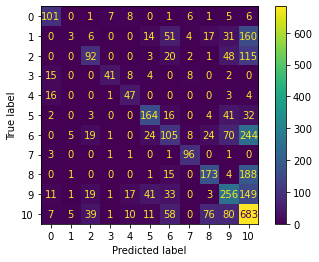

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

# Narrow down the Classes

In [13]:
# Combining Alt Music, Indie Alt, and Rock
y_train = y_train.replace(to_replace=[1, 6], value=10)
y_test = y_test.replace(to_replace=[1, 6], value=10)

In [14]:
params = {'n_neighbors':[1,5,10,20,30,40,50,60,70,80,90,100]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.6485829377484466
Best Parameters: {'n_neighbors': 30}


# Running the most accurate parameter for model

In [15]:
kNN = KNeighborsClassifier(30)
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       136
           2       0.66      0.19      0.29       281
           3       0.82      0.53      0.64        78
           4       0.51      0.62      0.56        71
           5       0.65      0.58      0.62       262
           7       0.81      0.93      0.87       103
           8       0.70      0.30      0.42       382
           9       0.57      0.30      0.40       531
          10       0.64      0.89      0.75      1756

    accuracy                           0.65      3600
   macro avg       0.67      0.56      0.58      3600
weighted avg       0.65      0.65      0.61      3600



# Create updated confusion matrix

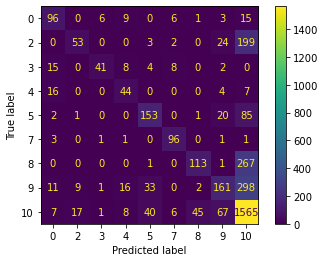

In [16]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

# Account for distance

In [17]:
kNN = KNeighborsClassifier(n_neighbors=30, weights='distance')
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       136
           2       0.57      0.17      0.27       281
           3       0.81      0.54      0.65        78
           4       0.54      0.62      0.58        71
           5       0.68      0.57      0.62       262
           7       0.82      0.94      0.87       103
           8       0.60      0.29      0.39       382
           9       0.50      0.29      0.37       531
          10       0.63      0.86      0.73      1756

    accuracy                           0.63      3600
   macro avg       0.64      0.56      0.57      3600
weighted avg       0.62      0.63      0.59      3600



# "Distance" confusion matrix

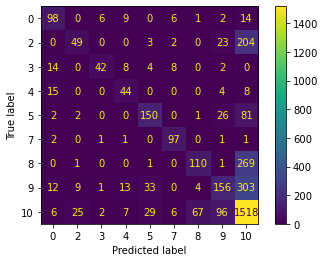

In [18]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

In [19]:
dataset = pd.read_csv(r"C:\Users\CaptM\OneDrive\Desktop\CSCE 4205\Group Project\train.csv")

feature_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']

X_train, X_test, y_train, y_test = train_test_split(dataset[feature_columns], dataset['Class'], 
                                                    test_size=0.2, random_state=42)
imp_mean = IterativeImputer(random_state=42)
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
kNN = KNeighborsClassifier(n_neighbors=31)
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       136
           1       0.20      0.01      0.02       286
           2       0.51      0.33      0.40       281
           3       0.77      0.53      0.63        78
           4       0.52      0.66      0.58        71
           5       0.63      0.63      0.63       262
           6       0.35      0.21      0.26       500
           7       0.77      0.93      0.85       103
           8       0.58      0.45      0.51       382
           9       0.47      0.48      0.48       531
          10       0.43      0.70      0.54       970

    accuracy                           0.49      3600
   macro avg       0.54      0.52      0.51      3600
weighted avg       0.47      0.49      0.46      3600



# Confusion Matrix: all classes

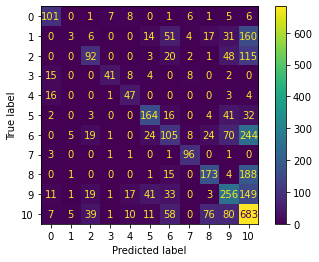

In [21]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

In [22]:
def find_class_name(test):
    name = ""
    if test == 0:
        name = "Acoustic/Folk"
    if test == 1:
        name = "Alt Music"
    if test == 2:
        name = "Blues"
    if test == 3:
        name = "Bollywood"
    if test == 4:
        name = "Country"
    if test == 5:
        name = "HipHop"
    if test == 6:
        name = "Indie Alt"
    if test == 7:
        name = "Instrumental"
    if test == 8:
        name = "Metal"
    if test == 9:
        name = "Pop"
    if test == 10:
        name = "Rock"
    return name

In [23]:
def class_prob(num):
    # predict_proba()
    # Return probability estimates for the test data X
    print("")
    print("{}".format(num+1))
    print("Probability of class:")
    print(kNN.predict_proba(X_test[num:num+1]))
    print("")
    pred = kNN.predict(X_test[num:num+1])
    pred = find_class_name(pred)
    actual = find_class_name(y_test.iloc[num])
    index = y_test.index[num]
    artist = dataset.iloc[index]["Artist Name"]
    song = dataset.iloc[index]["Track Name"]
    print("Artist: {}".format(artist))
    print("Song Name: {}".format(song))
    print("Prediction: {}".format(pred))
    print("Actual: {}".format(actual))
    

In [24]:
#for k in range(0,3599):
   #class_prob(k)

In [25]:
#0-3599 samples that can be used to check prob.
class_prob(946)


947
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.06451613
  0.         0.         0.03225806 0.16129032 0.64516129]]

Artist: Coldplay
Song Name: Yellow
Prediction: Rock
Actual: Pop
